In [1]:
pip install scikit-learn mglearn pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.6 MB/s eta 0:00:00


##**Import Library**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

##**2. Load Dataset**

In [3]:
# Load dataset dari file CSV
df = pd.read_csv("/content/sample_data/HeartDisease.csv")

# Menampilkan 5 baris pertama
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


##**Preprocessing Data**

In [4]:
# Cek apakah ada nilai yang hilang
print(df.isnull().sum())

# Memilih fitur dan target
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
            'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = 'num'

X = df[features]  # Fitur
y = df[target]    # Target (0 = tidak ada penyakit jantung, 1 = ada penyakit jantung)

df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
y = df['num']

print(y.value_counts())  # Melihat distribusi kelas

# Normalisasi fitur untuk meningkatkan performa model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi dataset menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
num
0    164
1    139
Name: count, dtype: int64


##**4. Membuat Model Logistic Regression**

In [7]:
# Pisahkan fitur dan target
X = df[features]
y = df['num']

# Drop rows with any missing values
df_cleaned = df.dropna()
X = df_cleaned[features]
y = df_cleaned['num']


# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Jalankan model lagi
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

##**5. Evaluasi Model**

In [8]:
y_pred = model.predict(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Bersihkan data dari NaN
df.fillna(df.isnull(), inplace=True)

# Pisahkan fitur dan target
X = df.drop(columns=['num'])  # Semua kolom kecuali 'num' sebagai fitur
y = df['num']  # Target

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data menjadi training & testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Latih model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Buat prediksi
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas 1

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Tampilkan hasil
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.8361
Precision: 0.8438
Recall: 0.8438
F1 Score: 0.8438
ROC AUC Score: 0.9181


##**Plot ROC Curve

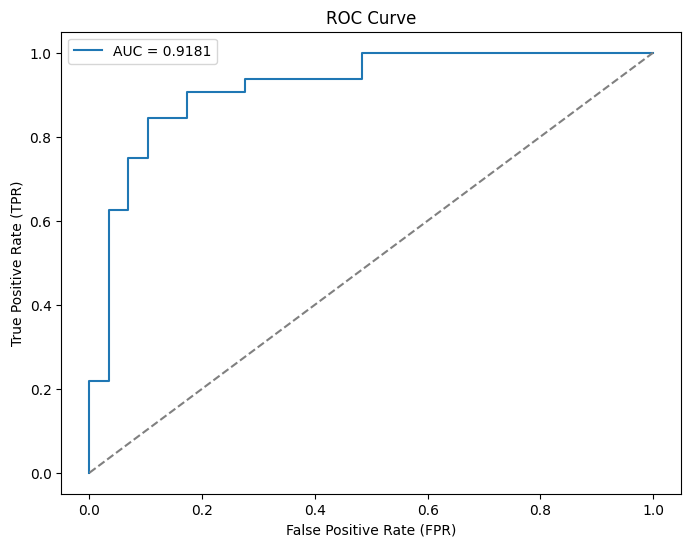

In [10]:
# Menghitung ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

##**7. Penjelasan Matematika**

**a. Persamaan Logistic Regression**

Logistic regression menggunakan fungsi sigmoid untuk memprediksi probablitias kelas:

P(y-1∣X)= 1/ 1+e −(β 0​+β 1​X 1​+β 2​X 2​+...+β n​X n​)

dimana:

* P(y-1∣X) adalah probabilitas suatu sampel termasuk dalam kelas 1 (menderita penyakit jantung)
* Xi adalah fitur input
* βi adalah koefisien model
* e adalah bilangan Euler (~2.718)

jika probabilitas lebih dari 0.5, sampel diklasifikasikan sebagai 1 (ada penyakit), jika kurang dari 0.5, diklasifikasikan sebagai 0 (tidak ada penyakit).

**b. Accuracy**

Akurasi mengukur berapa banyak prediksi yang benar dibandingan dengan total data:

Akurasi= TP+TN / TP+TN+FP+FN

**c. Precision**
Presisi mengukur seberapa banyak prediksi positif yang benar:

Presisi= TP / TP+FP

**d. Recall (Sensitivitas)**
Recall mengukur seberapa banyak kasus positif yang berhasil dideteksi:

Recall= TP / TP+FN

**f. ROC & AUC (Area Under Curve)**
ROC Curve menunjukkan hubungan antara False Positive Rate (FPR) dan True Positive Rate (TPR):

TPR= TP / TP+FN , FPR= FP / FP+TN

AUC adalah luas area di bawah kurva ROC

* AUC = 1 berarti model sempurna
* AUC = 0.5 berarti model tidak lebih baik dari tebak-tebakan acak.